## Projet Power BI ==> Création Dashboard pour suivre les activités projet de l'équipe

- Entreprise KFS
- Equipe : maintenance des gammes
- Manager : Frédéric Bordier 
- Stage Data Analyst 2023-2024  CEFIM : Awatef Malassinet

<!-- Création de données factices -->

#### 1- Création d'un jeu de données factices

In [ ]:
# CODE QUI FONCTIONNE 

import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialisation de Faker pour générer des données aléatoires
fake = Faker()

# Liste des valeurs possibles pour certaines colonnes
Type_de_projet = ["Amélioration Continue", "Maintenances Systèmes", "Innovation","Compétences",
                  "Support Production", "Autres"]
Sous_type_de_projet = ["Optimisation des processus de fabrication", "Maintenance préventive des équipements",  "Recherche nouveaux fournisseurs",
                        "Développement de prototypes", "Formation", "Assistance technique", "Documentation", "Packaging","Obsolescence"]
Statut = ["Terminé", "En cours", "Annulé"]
Categorie = ["Véhicule Commercial", "Voiture Particulière", "Motocycle"]
Motorisation = ["Electrique", "Fossile"]
Gamme_produit = ["SUV", "Crossover", "Citadine",  "Utilitaire" , "Berline" , "Monospace" , "Cabriolet"]
Couleur = ["Noire", "Blanche", "Bleu", "Gris", "Jaune", "Rose", "Rouge", "Vert", "Violet"]
Interlocuteur_interne = ["Berlin", "Le Professeur", "Denver", "Rio", "Nairobi" ,  "Tokyo", "Moscou",  "Helsinki", "Oslo"]
Client = ["Apple", "Toyota", "Airbus", "Sanofi", "Procter & Gamble" , "Samsung", "Total", "L'Oréal"]

# Proportions pour chaque colonne
proportions_type_projet = [15, 35, 25 , 7, 15, 3]
proportions_statut = [85, 17, 3]
proportions_priorite = [20, 70, 10]
proportions_categorie = [20,75,5]  # Inversé pour correspondre à 80% Fossile et 20% Electrique
proportions_motorisation = [20, 80]  # Inversé pour correspondre à 80% Fossile et 20% Electrique
proportions_gamme_produit = [39, 27, 16 , 8, 6, 2 , 1]
proportions_interlocuteur = [14 ,17, 9, 8, 11 , 14 ,8, 10 ,9]
proportions_dead_line = [90, 10]  # 90% entre 7 jours et 21 jours, 10% entre 1 et 6 mois
proportions_date_fin = [90, 10]  # 90% inférieure ou égale à la dead line, 10% supérieure de maximum un mois

# Fonction pour générer une date aléatoire dans une plage donnée
def generate_random_date(start_date, end_date):
    return fake.date_between_dates(date_start=start_date, date_end=end_date)

# Fonction pour générer une date de dead line en fonction des proportions
def generate_random_dead_line(start_date):
    if random.choices([True, False], weights=proportions_dead_line, k=1)[0]:
        # 90% entre 7 jours et 21 jours
        return start_date + timedelta(days=random.randint(7, 21))
    else:
        # 10% entre 1 et 6 mois
        return start_date + timedelta(days=random.randint(30, 180))

# Fonction pour générer une date de fin en fonction des proportions
def generate_random_date_fin(start_date, dead_line):
    if random.choices([True, False], weights=proportions_date_fin, k=1)[0]:
        # 90% inférieure ou égale à la dead line
        return min(start_date + timedelta(days=random.randint(0, (dead_line - start_date).days)), dead_line)
    else:
        # 10% supérieure de maximum un mois
        return min(start_date + timedelta(days=random.randint(0, 30)), dead_line)

# Fonction pour générer un DataFrame avec 3000 lignes
def generate_random_dataframe():
    data = []
    for _ in range(1000):
        start_date = generate_random_date(datetime(2020, 1, 1), datetime(2024, 12, 31))
        dead_line = generate_random_dead_line(start_date)
        data.append([
            random.choices(Type_de_projet, weights=proportions_type_projet, k=1)[0],  
            fake.random_element(Sous_type_de_projet),
            fake.sentence(),
            random.choices(Statut, weights=proportions_statut, k=1)[0],  
            random.choices(range(1, 4), weights=proportions_priorite, k=1)[0],  
            random.choices(Categorie, weights=proportions_categorie, k=1)[0],  
            random.choices(Motorisation, weights=proportions_motorisation, k=1)[0], 
            random.choices(Gamme_produit , weights=proportions_gamme_produit, k=1)[0], 
            fake.random_element(Couleur),
            random.choices(Interlocuteur_interne , weights=proportions_interlocuteur, k=1)[0], 
            fake.random_element(Client),
            start_date,
            generate_random_date_fin(start_date, dead_line),
            dead_line
        ])

    columns = ["Type_de_projet", "Sous-type projet", "Description projet", "Statut", "Priorité", 
               "Catégorie produit", "Motorisation", "Gamme produit", "Couleur produit", "Interlocuteur interne", "Client", "date de début", "date de fin", "dead line"]
    
    df = pd.DataFrame(data, columns=columns)
    return df

# Génération du DataFrame
random_dataframe = generate_random_dataframe()

# Enregistrement du DataFrame au format CSV
random_dataframe.to_csv("C:\\Users\\amala\\Desktop\\ProjetsData\\PowerBI\\Stage_KFS\\data\\fait_todolist_KFS.csv", index=False)


#### 2- Création de WordCloud sous python

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# Chargez le DataFrame depuis le fichier CSV
df = pd.read_csv("C:\\Users\\amala\\Desktop\\ProjetsData\\PowerBI\\Stage_KFS\\data\\fait_todolist_KFS.csv")

# Liste des termes à afficher
grouped_terms = ["Amélioration", "Maintenances", "Innovation", "Compétences", "Support", "Autres", "Continue", "Systèmes", "Production"]

# Créez un dictionnaire associant chaque terme à une couleur
term_colors = {
    "Amélioration": "#0071BB",
    "Maintenances": "#D9B300",
    "Innovation": "#059A97",
    "Compétences": "#741A81",
    "Support": "#BDC3C7",
    "Autres": "#000000",
    "Continue": "#0071BB",
    "Systèmes": "#D9B300",
    "Production": "#BDC3C7"
}

# Tri des termes en fonction de leur position dans la liste
sorted_terms = sorted(grouped_terms, key=lambda x: grouped_terms.index(x))

# Définissez une fonction de couleur personnalisée
def color_func(word, font_size, position, orientation, random_state, font_path):
    return term_colors.get(word, "#000000")

# Créez l'objet WordCloud avec la fonction de couleur personnalisée et les termes triés
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, color_func=color_func,prefer_horizontal=0.6).generate(' '.join(df['Type_de_projet']))

# Affichez le WordCloud à l'aide de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Désactivez les axes
plt.show()

WordCloud Types de projets - Power BI

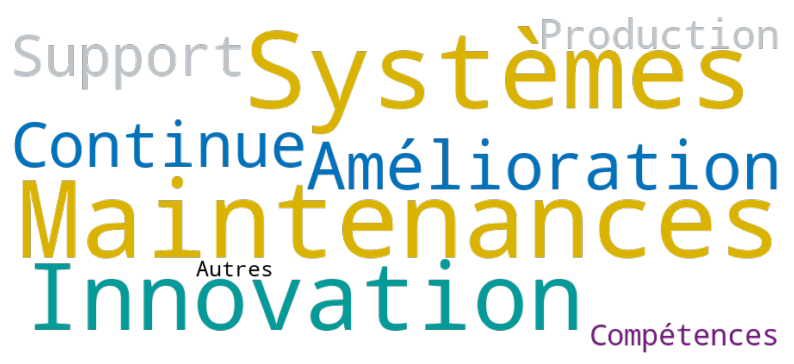

In [14]:
# CODE FONCTIONNE DANS POWER BI

# Le code suivant, qui crée un dataframe et supprime les lignes dupliquées, est toujours exécuté et sert de préambule à votre script : 

# dataset = pandas.DataFrame(undefined)
# dataset = dataset.drop_duplicates()

# Collez ou tapez votre code de script ici :

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Chargez le DataFrame depuis le fichier CSV
df = pd.read_csv("C:\\Users\\amala\\Desktop\\ProjetsData\\PowerBI\\Stage_KFS\\data\\fait_todolist_KFS.csv")

# Liste des termes à afficher
grouped_terms = ["Amélioration", "Maintenances", "Innovation", "Compétences", "Support", "Autres", "Continue", "Systèmes", "Production"]

# Créez un dictionnaire associant chaque terme à une couleur
term_colors = {
    "Amélioration": "#0071BB",
    "Maintenances": "#D9B300",
    "Innovation": "#059A97",
    "Compétences": "#741A81",
    "Support": "#BDC3C7",
    "Autres": "#000000",
    "Continue": "#0071BB",
    "Systèmes": "#D9B300",
    "Production": "#BDC3C7"
}

# Tri des termes en fonction de leur position dans la liste
sorted_terms = sorted(grouped_terms, key=lambda x: grouped_terms.index(x))

# Définissez une fonction de couleur personnalisée
def color_func(word, font_size, position, orientation, random_state, font_path):
    return term_colors.get(word, "#000000")

# Créez l'objet WordCloud avec la fonction de couleur personnalisée et les termes triés
wordcloud = WordCloud(width=900, height=400, background_color=None, mode="RGBA", collocations=False, prefer_horizontal=0.6, color_func=color_func).generate(' '.join(df['Type_de_projet']))

# Supprimez les bords blancs autour du nuage de mots
wordcloud_array = np.asarray(wordcloud)
non_white_pixels = np.any(wordcloud_array != 255, axis=-1)
cropped_wordcloud = wordcloud_array[np.ix_(non_white_pixels.any(1), non_white_pixels.any(0))]

# Affichez le WordCloud sans les bords blancs à l'aide de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cropped_wordcloud, interpolation='bilinear')
plt.axis('off')  # Désactivez les axes
plt.show()

WordCloud Catégories produit - Power BI

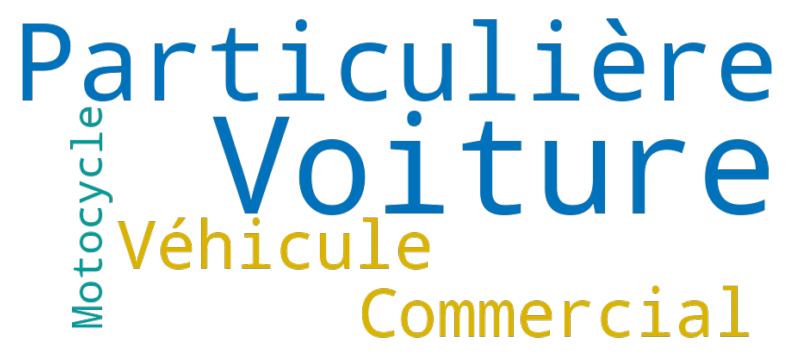

In [16]:
# CODE FONCTIONNE DANS POWER BI

# Le code suivant, qui crée un dataframe et supprime les lignes dupliquées, est toujours exécuté et sert de préambule à votre script : 

# dataset = pandas.DataFrame(Catégorie produit)
# dataset = dataset.drop_duplicates()

# Collez ou tapez votre code de script ici :

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Chargez le DataFrame depuis le fichier CSV
df = pd.read_csv("C:\\Users\\amala\\Desktop\\ProjetsData\\PowerBI\\Stage_KFS\\data\\fait_todolist_KFS.csv")

# Liste des termes à afficher
grouped_terms = ["Voiture Particulière", "Véhicule Commercial", "Motocycle"]

# Créez un dictionnaire associant chaque terme à une couleur
term_colors = {
    "Voiture": "#0071BB",
    "Véhicule": "#D9B300",
    "Motocycle": "#059A97",
    "Particulière": "#0071BB",
    "Commercial": "#D9B300",
}

# Tri des termes en fonction de leur position dans la liste
sorted_terms = sorted(grouped_terms, key=lambda x: grouped_terms.index(x))

# Définissez une fonction de couleur personnalisée
def color_func(word, font_size, position, orientation, random_state, font_path):
    return term_colors.get(word, "#000000")

# Créez l'objet WordCloud avec la fonction de couleur personnalisée et les termes triés
wordcloud = WordCloud(width=900, height=400, background_color=None, mode="RGBA", collocations=False, prefer_horizontal=0.6, color_func=color_func).generate(' '.join(df['Catégorie produit']))

# Supprimez les bords blancs autour du nuage de mots
wordcloud_array = np.asarray(wordcloud)
non_white_pixels = np.any(wordcloud_array != 255, axis=-1)
cropped_wordcloud = wordcloud_array[np.ix_(non_white_pixels.any(1), non_white_pixels.any(0))]

# Affichez le WordCloud sans les bords blancs à l'aide de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cropped_wordcloud, interpolation='bilinear')
plt.axis('off')  # Désactivez les axes
plt.show() 

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Chargez le DataFrame depuis le fichier CSV
df = pd.read_csv("C:\\Users\\amala\\Desktop\\ProjetsData\\PowerBI\\Stage_KFS\\data\\fait_todolist_KFS.csv")

# Liste des termes à afficher
grouped_terms = ["Voiture Particulière", "Véhicule Commercial", "Motocycle"]

# Créez un dictionnaire associant chaque terme à une couleur
term_colors = {
    "Voiture": "#0071BB",
    "Véhicule": "#D9B300",
    "Motocycle": "#059A97",
    "Particulière": "#0071BB",
    "Commercial": "#D9B300"
}

# Remplacez les espaces par des underscores dans les termes
grouped_terms_underscored = [term.replace(" ", "_") for term in grouped_terms]

# Tri des termes en fonction de leur position dans la liste
sorted_terms = sorted(grouped_terms, key=lambda x: grouped_terms.index(x))

# Définissez une fonction de couleur personnalisée
def color_func(word, font_size, position, orientation, random_state, font_path):
    return term_colors.get(word.replace("_", " "), "#000000")

# Créez l'objet WordCloud avec la fonction de couleur personnalisée et les termes triés
wordcloud = WordCloud(width=900, height=400, background_color=None, mode="RGBA", collocations=False, prefer_horizontal=0.6, color_func=color_func).generate(' '.join(df['Catégorie produit']))

# Supprimez les bords blancs autour du nuage de mots
wordcloud_array = np.asarray(wordcloud)
non_white_pixels = np.any(wordcloud_array != 255, axis=-1)
cropped_wordcloud = wordcloud_array[np.ix_(non_white_pixels.any(1), non_white_pixels.any(0))]

# Affichez le WordCloud sans les bords blancs à l'aide de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cropped_wordcloud, interpolation='bilinear')
plt.axis('off')  # Désactivez les axes
plt.show()
